In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv')

In [3]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
df.shape

(5171, 4)

## Data Cleaning

In [5]:
df.info

<bound method DataFrame.info of       Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3           4685  spam  Subject: photoshop , windows , office . cheap ...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
...          ...   ...                                                ...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
0             0  
1      

In [6]:
df1=df

In [7]:
def check(df):
    count_ham = df[(df['label'] == 'ham') & (df['label_num'] == 1)].shape[0]
    count_spam = df[(df['label'] == 'spam') & (df['label_num'] == 0)].shape[0]
    return count_ham + count_spam


In [8]:
check(df1)  #No discrepancies

0

In [9]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.drop(columns=['label'],inplace=True)

In [12]:
df.head()

,Unnamed: 0,text,label_num
0,605,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,"Subject: photoshop , windows , office . cheap ...",1
4,2030,Subject: re : indian springs\r\nthis deal is t...,0


## EDA

In [13]:
df['label_num'].value_counts()

label_num
0    3672
1    1499
Name: count, dtype: int64

In [14]:
import nltk

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adrij\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df['num_characters']=df['text'].apply(len)

In [17]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [18]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [19]:
df.head()

,Unnamed: 0,text,label_num,num_characters,num_words,num_sentences
0,605,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,2349,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,3624,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,4685,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,2030,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [20]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5171.000000,5171.000000,5171.000000
mean,1048.391994,229.181009,13.121253
std,1528.513435,336.487397,27.541637
min,11.000000,2.000000,1.000000
25%,244.000000,52.000000,4.000000
50%,540.000000,122.000000,7.000000
75%,1237.000000,283.500000,15.000000
max,32258.000000,8863.000000,1204.000000


In [21]:
df[df['label_num']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3672.000000,3672.000000,3672.000000
mean,977.008170,226.239107,11.440904
std,1382.827493,332.179661,24.892442
min,18.000000,3.000000,1.000000
25%,231.750000,51.000000,3.000000
50%,530.000000,124.000000,6.000000
75%,1227.250000,294.000000,13.000000
max,32258.000000,8863.000000,1204.000000


In [22]:
df[df['label_num']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1499.000000,1499.000000,1499.000000
mean,1223.256171,236.387592,17.237492
std,1825.986210,346.821249,32.796043
min,11.000000,2.000000,1.000000
25%,283.000000,55.000000,4.000000
50%,576.000000,116.000000,9.000000
75%,1253.500000,244.000000,18.500000
max,22073.000000,3963.000000,693.000000


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

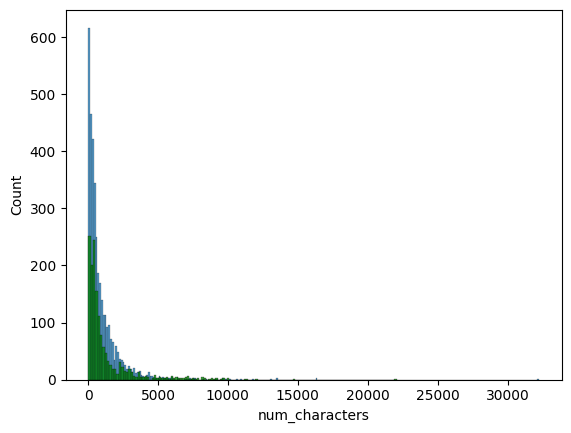

In [24]:
sns.histplot(df[df['label_num']==0]['num_characters'])
sns.histplot(df[df['label_num']==1]['num_characters'],color='green')

In [25]:
numeric_columns = df.select_dtypes(include='number')

<Axes: >

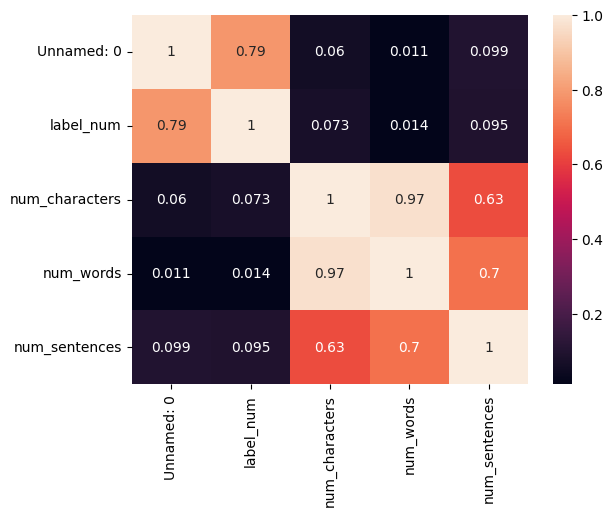

In [26]:
sns.heatmap(numeric_columns.corr(),annot=True)

In [27]:
# we see that there is a strong correlation between the number of characters, words and sentences so we are taking only one of them

## Data Preprocessing

In [28]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [29]:
ps=PorterStemmer()
ps.stem('singing')

'sing'

In [30]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [31]:
transform_text('I want to go to swimming at Sunderbans')

'want go swim sunderban'

In [41]:
df['transformed_text']=df['text'].apply(transform_text)

In [42]:
df.head()

,Unnamed: 0,text,label_num,num_characters,num_words,num_sentences,transformed_text
0,605,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,2349,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,3624,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,4685,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,2030,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


In [35]:
from wordcloud import WordCloud

In [36]:
wc=WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [43]:
spam_wc=wc.generate(df[df['label_num']==1]['transformed_text'].str.cat(sep=" "))

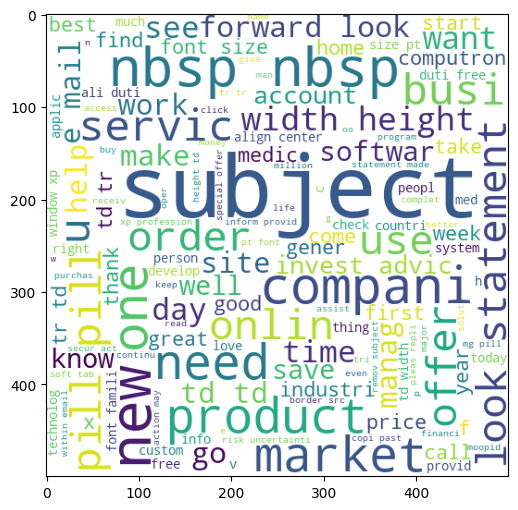

In [44]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [45]:
ham_wc=wc.generate(df[df['label_num']==0]['transformed_text'].str.cat(sep=" "))

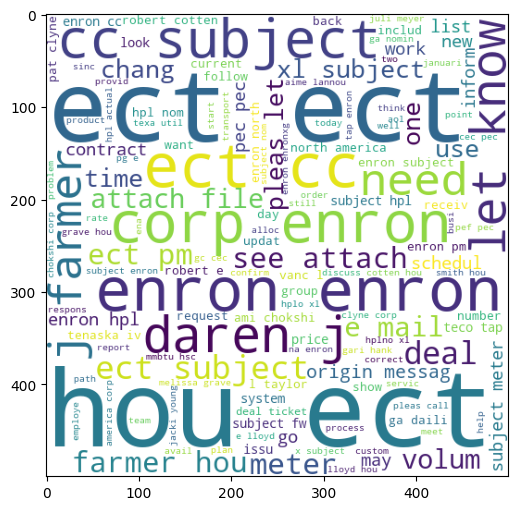

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [49]:
spam_corpus=[]
for msg in df[df['label_num']==1]['transformed_text'].to_list():
    for words in msg.split():
        spam_corpus.append(words)


In [56]:
spam_corpus

['subject',
 'photoshop',
 'window',
 'offic',
 'cheap',
 'main',
 'trend',
 'abas',
 'darer',
 'prudent',
 'fortuit',
 'undergon',
 'lightheart',
 'charm',
 'orinoco',
 'taster',
 'railroad',
 'affluent',
 'pornograph',
 'cuvier',
 'irvin',
 'parkhous',
 'blameworthi',
 'chlorophyl',
 'robe',
 'diagrammat',
 'fogarti',
 'clear',
 'bayda',
 'inconvenienc',
 'manag',
 'repres',
 'smart',
 'hashish',
 'academi',
 'sharehold',
 'unload',
 'bad',
 'danielson',
 'pure',
 'caffein',
 'spaniard',
 'chargeabl',
 'levin',
 'subject',
 'look',
 'medic',
 'best',
 'sourc',
 'difficult',
 'make',
 'materi',
 'condit',
 'better',
 'best',
 'law',
 'easi',
 'enough',
 'ruin',
 'bad',
 'law',
 'excus',
 'found',
 'best',
 'simpliest',
 'site',
 'medic',
 'net',
 'perscript',
 'easi',
 'deliveri',
 'privat',
 'secur',
 'easi',
 'better',
 'see',
 'rightli',
 'pound',
 'week',
 'squint',
 'million',
 'got',
 'anyth',
 'ever',
 'want',
 'erect',
 'treatment',
 'pill',
 'anti',
 'depress',
 'pill',
 'wei

In [50]:
len(spam_corpus)

197452

In [51]:
from collections import Counter

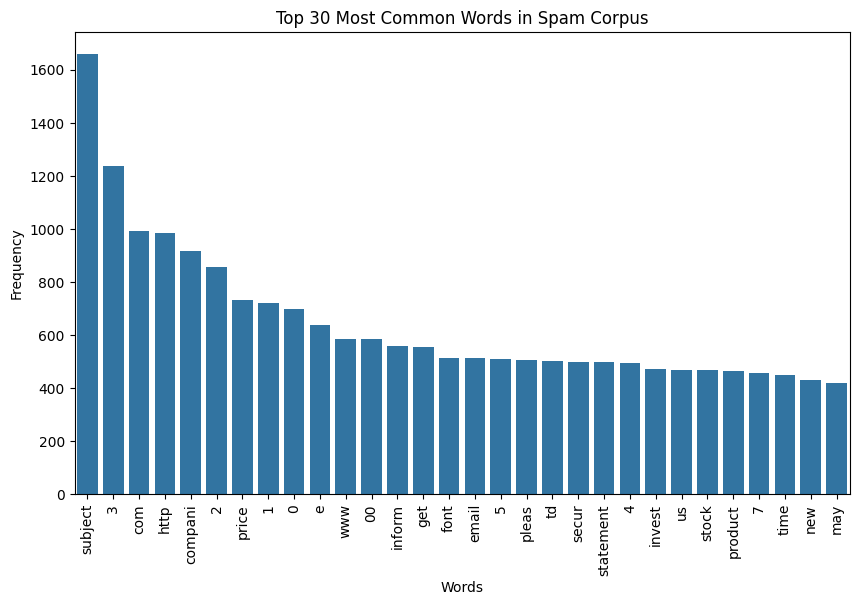

In [58]:
word_counts = Counter(spam_corpus)
top_words = [word[0] for word in word_counts.most_common(30)]
word_frequencies = [word[1] for word in word_counts.most_common(30)]
df_top_words = pd.DataFrame({'Word': top_words, 'Frequency': word_frequencies})

plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=df_top_words)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [64]:
ham_corpus=[]
for msg in df[df['label_num']==0]['transformed_text'].to_list():
    for words in msg.split():
        ham_corpus.append(words)


In [65]:
ham_corpus

['subject',
 'enron',
 'methanol',
 'meter',
 '988291',
 'follow',
 'note',
 'gave',
 'monday',
 '4',
 '3',
 '00',
 'preliminari',
 'flow',
 'data',
 'provid',
 'daren',
 'pleas',
 'overrid',
 'pop',
 'daili',
 'volum',
 'present',
 'zero',
 'reflect',
 'daili',
 'activ',
 'obtain',
 'ga',
 'control',
 'chang',
 'need',
 'asap',
 'econom',
 'purpos',
 'subject',
 'hpl',
 'nom',
 'januari',
 '9',
 '2001',
 'see',
 'attach',
 'file',
 'hplnol',
 '09',
 'xl',
 'hplnol',
 '09',
 'xl',
 'subject',
 'neon',
 'retreat',
 'ho',
 'ho',
 'ho',
 'around',
 'wonder',
 'time',
 'year',
 'neon',
 'leader',
 'retreat',
 'time',
 'know',
 'time',
 'year',
 'extrem',
 'hectic',
 'tough',
 'think',
 'anyth',
 'past',
 'holiday',
 'life',
 'go',
 'past',
 'week',
 'decemb',
 '25',
 'januari',
 '1',
 'like',
 'think',
 'minut',
 'calend',
 'hand',
 'begin',
 'fall',
 'semest',
 'retreat',
 'schedul',
 'weekend',
 'januari',
 '5',
 '6',
 'youth',
 'minist',
 'confer',
 'brad',
 'dustin',
 'connect',
 'week

In [66]:
len(ham_corpus)

388650

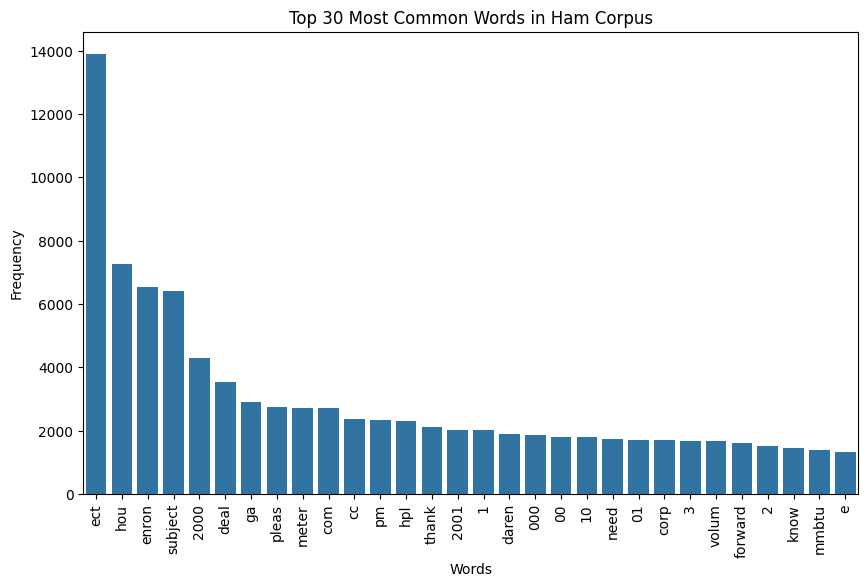

In [67]:
word_counts = Counter(ham_corpus)
top_words = [word[0] for word in word_counts.most_common(30)]
word_frequencies = [word[1] for word in word_counts.most_common(30)]
df_top_words = pd.DataFrame({'Word': top_words, 'Frequency': word_frequencies})

plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=df_top_words)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Ham Corpus')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

## Model Building

In [160]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [138]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [139]:
X.shape

(5171, 42592)

In [140]:
y=df['label_num'].values

In [141]:
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [144]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [145]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [146]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9642512077294686
[[734  12]
 [ 25 264]]
0.9565217391304348


In [147]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9719806763285024
[[729  17]
 [ 12 277]]
0.9421768707482994


In [148]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.851207729468599
[[725  21]
 [133 156]]
0.8813559322033898


In [161]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [162]:
X.shape

(5171, 42592)

In [163]:
y=df['label_num'].values

In [164]:
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [175]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [176]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [177]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9516908212560387
[[717  29]
 [ 21 268]]
0.9023569023569024


In [178]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9227053140096618
[[746   0]
 [ 80 209]]
1.0


In [179]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.851207729468599
[[725  21]
 [133 156]]
0.8813559322033898


In [180]:
# tfid with mnb Acc=92.27% and precision=100%

In [182]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))